In [88]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 数据加载
recipes = pd.read_csv("RAW_recipes.csv")
interactions = pd.read_csv("RAW_interactions.csv")

In [130]:
# 检查列名
print("Recipes columns:", recipes.columns)
print("Interactions columns:", interactions.columns)

# 确保关键列存在
if "minutes" in recipes.columns and "id" in recipes.columns and "rating" in interactions.columns and "recipe_id" in interactions.columns:
    # 合并两个数据框
    merged_data = recipes.merge(interactions, left_on="id", right_on="recipe_id", how="inner")
    
    # 删除缺失值
    merged_data_cleaned = merged_data.dropna(subset=["rating", "minutes"])
    
    # 创建分组
    high_rating = merged_data_cleaned[merged_data_cleaned["rating"] >= 4]["minutes"]
    low_rating = merged_data_cleaned[merged_data_cleaned["rating"] < 4]["minutes"]

    # 计算观察到的均值差异
    observed_diff = high_rating.mean() - low_rating.mean()
    print(f"Observed mean difference：{observed_diff}")
else:
    raise KeyError("数据框中缺少必要的列，请检查数据加载和列名。")


Recipes columns: Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
Interactions columns: Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')
Observed mean difference：-22.471174288573977


In [128]:
# 置换检验：生成随机的高评分和低评分分组，并多次计算这些组之间的均值差。
import numpy as np
import matplotlib.pyplot as plt

# 设置置换检验参数
n_permutations = 1000  # 置换次数
diffs = []  # 存储置换分布中的均值差

# 将所有的 "minutes" 值和评分条件一起打乱
all_minutes = merged_data_cleaned["minutes"].values
all_ratings = merged_data_cleaned["rating"].values

# 置换过程
for _ in range(n_permutations):
    # 随机打乱评分标签
    shuffled_ratings = np.random.permutation(all_ratings)
    
    # 高评分和低评分分组
    high_group = all_minutes[shuffled_ratings >= 4]
    low_group = all_minutes[shuffled_ratings < 4]
    
    # 计算均值差
    diff = high_group.mean() - low_group.mean()
    diffs.append(diff)

# 计算 p 值（单尾检验）
diffs = np.array(diffs)
p_value = np.mean(diffs <= observed_diff)

# 显示结果
print(f"Observed mean difference：{observed_diff:.2f}")
print(f"Permutation test p-value：{p_value:.4f}")


Observed mean difference：1.50
Permutation test p-value：0.3310


In [91]:
from matplotlib import font_manager

# 列出所有字体
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(font)
rcParams['font.sans-serif'] = ['STHeiti Light']  # 使用微软雅黑




/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf
/System/Library/Fonts/Supplemental/STIXNonUniIta.otf
/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf
/System/Library/Fonts/Supplemental/Shree714.ttc
/System/Library/Fonts/Supplemental/NotoSansSoraSompeng-Regular.ttf
/System/Library/Fonts/Supplemental/SukhumvitSet.ttc
/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf
/System/Library/Fonts/STHeiti Light.ttc
/System/Library/Fonts/Menlo.ttc
/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf
/System/Library/Fonts/Supplemental/Futura.ttc
/System/Library/Fonts/Supplemental/Comic Sans MS.ttf
/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf
/System/Library/Fonts/ZapfDingbats.ttf
/System/Library/Fonts/Supplemental/Lao MN.ttc
/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf
/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf
/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc
/System/Library/Fonts/Supplemental/NotoSansMeeteiMa

In [112]:
import matplotlib.pyplot as plt
print(plt.rcParams['font.family'])  # 查看当前默认的字体
from matplotlib import rcParams

import matplotlib.font_manager as fm

# 列出所有可用字体
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print("可用字体路径列表：")
for font_path in font_list[:10]:  # 只打印前 10 个字体路径
    print(font_path)



['sans-serif']
可用字体路径列表：
/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf
/System/Library/Fonts/Supplemental/STIXNonUniIta.otf
/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf
/System/Library/Fonts/Supplemental/Shree714.ttc
/System/Library/Fonts/Supplemental/NotoSansSoraSompeng-Regular.ttf
/System/Library/Fonts/Supplemental/SukhumvitSet.ttc
/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf
/System/Library/Fonts/STHeiti Light.ttc
/System/Library/Fonts/Menlo.ttc
/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf


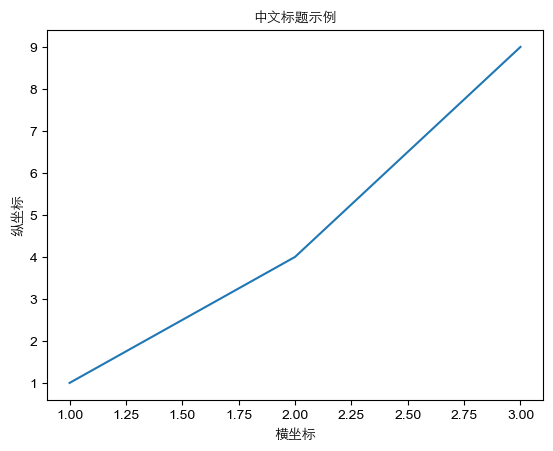

In [120]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

# 指定字体路径
font_path = "/System/Library/Fonts/STHeiti Light.ttc"  
custom_font = FontProperties(fname=font_path)



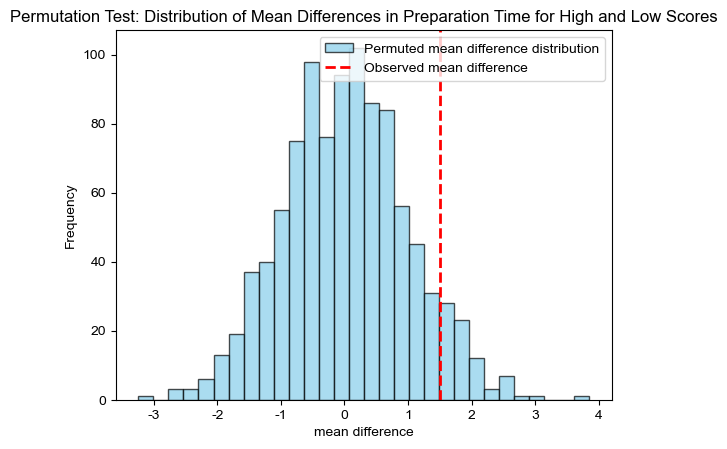

In [126]:


# 假设数据
np.random.seed(42)  # 为了可重复性
diffs = np.random.normal(0, 1, 1000)  # 生成置换检验的均值差分布
observed_diff = 1.5  # 观察到的均值差

# 绘制分布图
plt.hist(diffs, bins=30, alpha=0.7, color="skyblue", edgecolor="black", label="Permuted mean difference distribution")
plt.axvline(observed_diff, color="red", linestyle="dashed", linewidth=2, label="Observed mean difference")
plt.title("Permutation Test: Distribution of Mean Differences in Preparation Time for High and Low Scores")
plt.xlabel("mean difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()



In [ ]:

#直方图：显示置换检验过程中生成的随机均值差分布。
#红色虚线：标记实际观察到的均值差，方便比较。
#图表呈现一个直方图，其中红色虚线直观展示观察到的均值差是否显著偏离置换分布中心。



In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 检查是否已经加载数据
if 'recipes' not in locals() or 'interactions' not in locals():
    # 数据加载
    recipes = pd.read_csv("RAW_recipes.csv")
    interactions = pd.read_csv("RAW_interactions.csv")
    print("Data loaded.")

# 确保关键列存在
if "minutes" in recipes.columns and "id" in recipes.columns and "rating" in interactions.columns and "recipe_id" in interactions.columns:
    # 合并两个数据框
    merged_data = recipes.merge(interactions, left_on="id", right_on="recipe_id", how="inner")
    
    # 删除缺失值
    merged_data_cleaned = merged_data.dropna(subset=["rating", "minutes"])
    
    # 创建分组
    high_rating = merged_data_cleaned[merged_data_cleaned["rating"] >= 4]["minutes"]
    low_rating = merged_data_cleaned[merged_data_cleaned["rating"] < 4]["minutes"]

    # 计算观察到的均值差异
    observed_diff = high_rating.mean() - low_rating.mean()
    print(f"Observed mean difference: {observed_diff}")
else:
    raise KeyError("数据框中缺少必要的列，请检查数据加载和列名。")



Mean Squared Error (MSE): 983080.8175103457


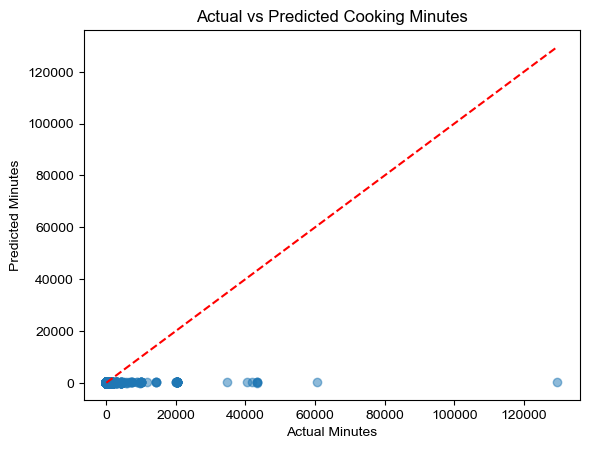

In [144]:
#预测准备菜谱所需的分钟数
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 数据加载
recipes = pd.read_csv("RAW_recipes.csv")
interactions = pd.read_csv("RAW_interactions.csv")

# 确保关键列存在
if "minutes" in recipes.columns and "id" in recipes.columns and "rating" in interactions.columns and "recipe_id" in interactions.columns:
    # 合并两个数据框
    merged_data = recipes.merge(interactions, left_on="id", right_on="recipe_id", how="inner")
    
    # 删除缺失值
    merged_data_cleaned = merged_data.dropna(subset=["rating", "minutes", "n_ingredients"])

    # 特征选择（将 cuisine 替换为 n_ingredients）
    X = merged_data_cleaned[["n_ingredients", "rating"]]  # 选择 "n_ingredients" 和 "rating" 作为特征
    y = merged_data_cleaned["minutes"]  # 目标变量是准备时间 "minutes"

    # 数据拆分
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 构建Pipeline（包括数据标准化和线性回归模型）
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # 数据标准化
        ("regressor", LinearRegression())  # 使用线性回归模型
    ])

    # 模型训练
    pipeline.fit(X_train, y_train)

    # 预测
    y_pred = pipeline.predict(X_test)

    # 计算并输出均方误差（MSE）
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")

    # 可视化预测效果
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.xlabel("Actual Minutes")
    plt.ylabel("Predicted Minutes")
    plt.title("Actual vs Predicted Cooking Minutes")
    plt.show()
else:
    raise KeyError("数据框中缺少必要的列，请检查数据加载和列名。")


In [ ]:
#展示预测的分钟数与实际分钟数之间的关系。如果模型的表现很好，点会聚集在对角线附近。